Evaluating model: random_forest
Classification report saved for random_forest: ../reports/random_forest_classification_report.csv
Confusion matrix saved for random_forest: ../reports/random_forest_confusion_matrix.png
Evaluating model: xgboost
Classification report saved for xgboost: ../reports/xgboost_classification_report.csv
Confusion matrix saved for xgboost: ../reports/xgboost_confusion_matrix.png

Model evaluation summary saved to: ../reports/model_evaluation_summary.csv


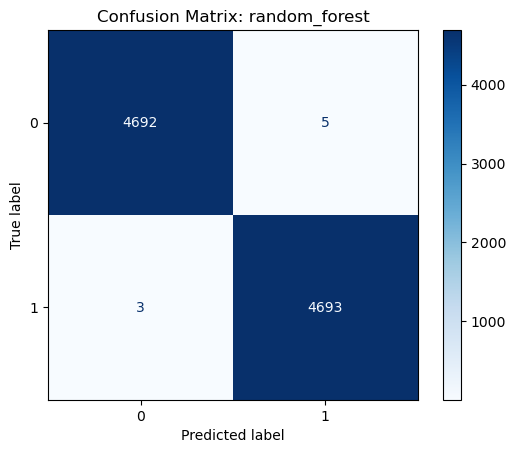

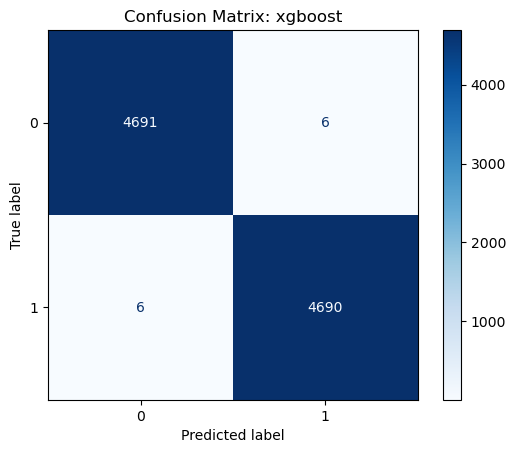

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib  # For loading trained models

# Paths
test_data_path = '../data/processed/X_test.npy'
test_labels_path = '../data/processed/y_test.npy'
selected_models_path = '../reports/selected_models.txt'
models_dir = '../models/'

# Load test data
X_test = np.load(test_data_path)
y_test = np.load(test_labels_path)

# Load selected models
with open(selected_models_path, 'r') as f:
    selected_models = f.read().splitlines()

# Initialize a dictionary to store evaluation results
evaluation_results = {}

# Evaluate each model
for model_name in selected_models:
    print(f"Evaluating model: {model_name}")
    model_path = models_dir + model_name + '.pkl'
    model = joblib.load(model_path)  # Load model
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Generate performance metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    # Save classification report
    evaluation_results[model_name] = report
    report_path = f'../reports/{model_name}_classification_report.csv'
    pd.DataFrame(report).transpose().to_csv(report_path)
    print(f"Classification report saved for {model_name}: {report_path}")
    
    # Plot and save confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {model_name}')
    cm_path = f'../reports/{model_name}_confusion_matrix.png'
    plt.savefig(cm_path)
    print(f"Confusion matrix saved for {model_name}: {cm_path}")

# Save consolidated evaluation results
results_summary_path = '../reports/model_evaluation_summary.csv'
evaluation_summary = pd.DataFrame(evaluation_results).T
evaluation_summary.to_csv(results_summary_path)
print(f"\nModel evaluation summary saved to: {results_summary_path}")
